<div style="font-size: 24px; font-weight: bold; margin-bottom: 10px; text-decoration: underline;">From unknown data to profession quality graphs</div>

# Subject
> As a data scientist, you are tasked by a newspaper to prepare 3 striking visuals to support an article about youtube 2023 statistics.

**Goal:** During this lab, you will prepare 3 general public data visualization **with** interpretation/story to create a clear and efficient communication tool.

**Topic:** You explore in depth a dataset and design great visuals.

<div class="alert alert-info" role="alert">
  <strong>Find your own dataset (30 minutes max) and present your choice to the instructor before going ahead.</strong>

  <p>
    Browse the internet to find an interesting dataset containing lots of data (> 1KB). For instance, you can browse <a href="https://github.com/awesomedata/awesome-public-datasets" target="_blank" rel="noopener">
      this github repo
    </a>
  </p>
    Or any open/NGO/goverment body dataset.
  <ul>
    <li>
      <a href="https://www.data.gouv.fr/datasets/carte-des-loyers-indicateurs-de-loyers-dannonce-par-commune-en-2025" target="_blank" rel="noopener">
        French Government rental price index
      </a>
    </li>
    <li>
      <a href="https://www.data.gouv.fr/datasets/population" target="_blank" rel="noopener">
        French population dataset
      </a>
    </li>
  </ul>
</div>

**Software:** You will explore data using pandas and plotting tools in this jupyter notebook. For the final version of your graphs, you can use any software you deem fit.

**Duration in class:** 6h (exploration of the data and hand design of the visuals) +2h full class presentation of your work. 

**In this Notebook/Report:**
- Present the dataset and your understanding of it
- Explain what data analysis/exploration you have done. Feel free to manipulate the data and extract/compute information from the set.
- Show inspiration sources you have used (if any)
- Show your draft version(s), including a hand-drawn graph layout for each of your graphs
- Write a storyboard (not a story)
- Describe building steps of each of your visuals
- Save each of your visuals in a separate file for quick review.

**Graph types:**
- One graph has to be a map if the data contains geographical data
- One has to be picked in this list of less common graphs (violin plot, ridge line plot, sankey diagram, heatmap, radial plot, dumbbel plot or scatter with 3 or 4 variables encode)
- Free graph type: check your choice with instructor early on

<div class="alert alert-danger" role="alert">
 Pie charts and simple bar charts / line charts are strictly <b>forbidden</b>. 
</div>

Each type has to deal with a different aspect of the dataset. It is a plus if they form a coherent set.

**Prepare** a storyboard for each graph to be presented to the instructor before the end of Thursday session.

**Remarks:** The visuals may contain subplots, text or any visual cue that will help the reader understand your point!
 
**Grading:**

- **groups of 2 only**
- this has to be original work
- 5/20 is based on your presentation.
- 30% of the total grade

<div class="alert alert-warning" role="alert">
   <b> General remarks about previous years : </b> 
</div>

- Lack of hindsight and understanding of what they were doing e.g. unbelievable values are taken for ground truth. 
- General misinterpretation of the storytelling. No need to write a press article. Just make sure your title (and subtitle) make the graph meaning obvious! 
- Too many simple graphs without proper packaging

# Data exploration

<div class="alert alert-info" role="alert">
    <b> Context: </b> Your first task is to explore the dataset with python libraries starting with pandas and data viz tools such as matplotlib, plotly, seaborn... Feel free to use online ressources for inspiration and code snipets. You will have to present your work, so make sure you understand what you are doing.
    <p>The datasets are not perfect. Make sure the data you're plotting is clean.</p>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

### First, we can clean the data set because, the columns status, lacationSource, magsource, magNst, type, updated, id and net well not be use.

We drop also a line if we have any missing value. Sins we have more than 1800 lines, drop ~100 lines well not distorded the result.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv("query-2.csv")
df_old = df.copy() # for comparison after cleaning

# filter, drop
cols_to_drop = ["status", "locationSource", "magSource", "magNst", "type", "updated", "id", "net"]
df = df.drop(columns=cols_to_drop, errors="ignore")

# drop rows with all missing value
df = df.dropna()

# (optionnel) reset index
df = df.reset_index(drop=True)

# first 10 rows to have a look
df.head(10)



time  latitude  longitude    depth  mag magType    nst  \
0  2025-12-31T23:52:11.327Z   51.4799   159.4029   45.690  4.3      mb   40.0   
1  2025-12-31T23:04:28.213Z   51.3484   159.7882   13.223  4.6      mb   82.0   
2  2025-12-31T22:09:55.441Z   -7.1001   129.3331  171.476  4.3      mb   23.0   
3  2025-12-31T20:36:21.785Z   60.0480  -152.7710  101.200  4.0      ml  221.0   
4  2025-12-31T20:27:43.684Z   51.3600   159.7160   10.000  4.9      mb  103.0   
5  2025-12-31T18:44:42.508Z  -16.4461  -175.3776  235.071  4.2      mb   15.0   
6  2025-12-31T17:31:38.869Z   39.6645   143.5334   30.009  4.3      mb   30.0   
7  2025-12-31T17:30:44.036Z   40.1109   142.8847   39.648  4.2      mb   27.0   
8  2025-12-31T17:30:37.872Z    7.3549   126.9864   28.381  4.6      mb   79.0   
9  2025-12-31T16:56:59.040Z    9.6143   126.1051   94.532  4.3      mb   16.0   

     gap   dmin   rms                              place  horizontalError  \
0  135.0  1.938  0.71  175 km SSE of Vilyuchinsk, Russia             7.79   
1  128.0  2.181  0.88  199 km SSE of Vilyuchinsk, Russia             8.86   
2   72.0  2.623  0.82         Kepulauan Babar, Indonesia             9.63   
3   65.0  0.100  0.90    59 km W of Happy Valley, Alaska             0.00   
4  111.0  2.146  0.81  196 km SSE of Vilyuchinsk, Russia             8.43   
5  156.0  4.291  0.46        177 km WSW of Hihifo, Tonga             9.18   
6  142.0  2.199  1.00          136 km E of Miyako, Japan             8.21   
7  174.0  1.545  0.82             90 km E of Noda, Japan             8.42   
8   41.0  1.425  1.32  45 km ESE of Baculin, Philippines             7.39   
9  135.0  2.581  1.20    15 km E of Socorro, Philippines            13.99   

   depthError  magError  
0      7.1440     0.099  
1      4.9360     0.067  
2      9.7580     0.129  
3      1.3054     0.300  
4      1.8480     0.058  
5     14.8220     0.153  
6      5.1870     0.137  
7      9.2220     0.153  
8      4.2310     0.068  
9      7.1700     0.161

In [3]:
dif_line = df_old.shape[0] - df.shape[0]
dif_col = df_old.shape[1] - df.shape[1]
print (f"\n Number of columns dropped: {dif_col} ")
print (f"\n Number of rows dropped: {dif_line} \n ")

df.info()



 Number of columns dropped: 8 

 Number of rows dropped: 103 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18166 entries, 0 to 18165
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             18166 non-null  object 
 1   latitude         18166 non-null  float64
 2   longitude        18166 non-null  float64
 3   depth            18166 non-null  float64
 4   mag              18166 non-null  float64
 5   magType          18166 non-null  object 
 6   nst              18166 non-null  float64
 7   gap              18166 non-null  float64
 8   dmin             18166 non-null  float64
 9   rms              18166 non-null  float64
 10  place            18166 non-null  object 
 11  horizontalError  18166 non-null  float64
 12  depthError       18166 non-null  float64
 13  magError         18166 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.9+ MB


### Sins we have a clean data set, we can start the exploration.


-----------------------------------------------------------------------------------

We want to see where the earthquakes takes places

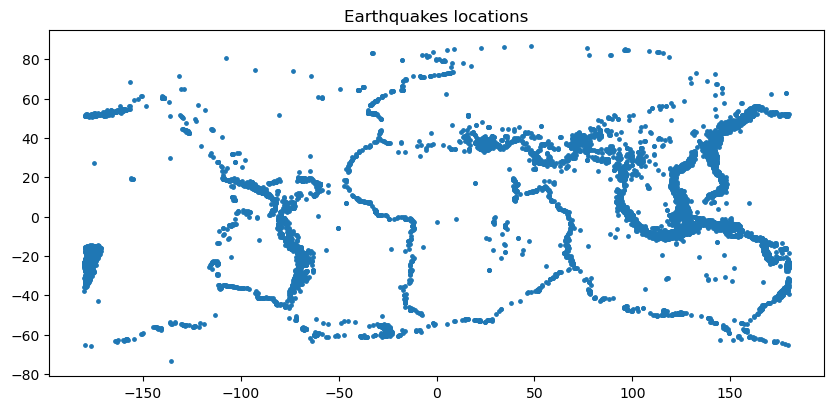

In [4]:
plt.figure(figsize=(10,4.5))
plt.scatter(df["longitude"], df["latitude"], s=6)
plt.title("Earthquakes locations")
plt.show()


In [5]:
lon, lat = df["longitude"].to_numpy(), df["latitude"].to_numpy()
counts, *_ = np.histogram2d(lon, lat, bins=[120, 60])
flat = counts.ravel()
top1 = flat[np.argsort(flat)][-max(1,int(0.01*len(flat))) :].sum() / flat.sum()
print("Share in top 1% densest cells:", round(top1*100, 2), "%")


Share in top 1% densest cells: 61.1 %


With the previous graphs, we can do 2 hypothesis :

Hypothesis H1: Earthquakes are not distributed randomly across the globe, they are concentrated along linear structures corresponding to the boundaries of tectonic plates (ridges, transform faults, subduction zones).

Hypothesis H2: Subduction zones experience more deep earthquakes (at great depths) than ridges (which tend to be shallow).

-------------------------------------------------------------------------------------

By our recherche, we find the theorie of Omori's and Mainshock

Mainshock: main event (often the maximum magnitude of the cluster).

Aftershocks: earthquakes triggered by the redistribution of stress after the mainshock.

Omori's law (idea): the frequency of aftershocks decreases over time (strong immediately after, then less and less following the 1/t function).

Baseline (here): number of earthquakes/day just before the mainshock, used as a reference for “normality.”

Measurable question: how many days does it take for the daily rate to return to the baseline level?

Translated with DeepL.com (free version)

In [6]:
d = df.copy()
d["time"] = pd.to_datetime(d["time"], utc=True, errors="coerce")
d = d.dropna(subset=["time","mag"]).sort_values("time")
t0 = d.loc[d["mag"].idxmax(), "time"]
t0


Timestamp('2025-07-29 23:24:52.483000+0000', tz='UTC')

In [7]:
prev_day = t0.floor("D") - pd.Timedelta(days=1)
baseline = d[d["time"].dt.floor("D") == prev_day].shape[0]
baseline


58

In [8]:
after_7d = d[(d["time"] >= t0) & (d["time"] < t0 + pd.Timedelta(days=7))]
after_7d.shape[0]


1701

In [9]:
window_days = 30
after = d[(d["time"] >= t0) & (d["time"] < t0 + pd.Timedelta(days=window_days))].copy()
daily = after.groupby(after["time"].dt.floor("D")).size()
daily.head()


time
2025-07-29 00:00:00+00:00     28
2025-07-30 00:00:00+00:00    645
2025-07-31 00:00:00+00:00    314
2025-08-01 00:00:00+00:00    234
2025-08-02 00:00:00+00:00    144
dtype: int64

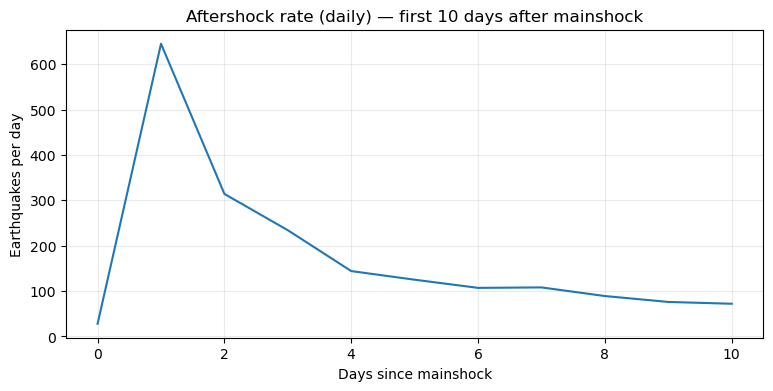

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d = df.copy()
d["time"] = pd.to_datetime(d["time"], utc=True, errors="coerce")
d = d.dropna(subset=["time","mag"]).sort_values("time").reset_index(drop=True)

# given mainshock time (yours)
t0 = pd.Timestamp("2025-07-29T23:24:52.483Z")

# choose how long after (example: 10 days)
window_days = 10
t1 = t0 + pd.Timedelta(days=window_days)

after = d[(d["time"] >= t0) & (d["time"] < t1)].copy()
after["day"] = after["time"].dt.floor("D")

daily = after.groupby("day").size()
days_since = (pd.to_datetime(daily.index) - t0.floor("D")).days.to_numpy()

plt.figure(figsize=(9,4))
plt.plot(days_since, daily.values)
plt.title(f"Aftershock rate (daily) — first {window_days} days after mainshock")
plt.xlabel("Days since mainshock")
plt.ylabel("Earthquakes per day")
plt.grid(alpha=0.25)
plt.show()



H1 : After a mainshock, seismic activity sharply increases and then gradually decreases over time. We hypothesize that the daily number of earthquakes will progressively decline and eventually return to the baseline level observed before the mainshock, following a typical aftershock decay pattern consistent with Omori’s law.


------------------------------------------------

In [11]:
boxes = {
    "Americas":     {"lat":(-60,83),"lon":(-170,-30)},
    "Europe":       {"lat":(35,72), "lon":(-25,45)},
    "Africa":       {"lat":(-35,38),"lon":(-20,55)},
    "Asia-Oceania": {"lat":(-50,80),"lon":(45,180)}
}

rows = []
for k,b in boxes.items():
    sub = df[df["latitude"].between(*b["lat"]) &
            df["longitude"].between(*b["lon"])]
    rows.append([k, sub["mag"].mean()])

import pandas as pd
pd.DataFrame(rows, columns=["continent","avg_mag"])


continent   avg_mag
0      Americas  4.506761
1        Europe  4.374185
2        Africa  4.407500
3  Asia-Oceania  4.512002

In [12]:
df["country"] = df["place"].str.split(",").str[-1].str.strip()
print(df["country"].value_counts().head(5))

country
Russia              4072
Indonesia           1417
Japan               1072
Papua New Guinea     865
Philippines          798
Name: count, dtype: int64


In [13]:
print("Correlation depth-mag:", df["depth"].corr(df["mag"]))


Correlation depth-mag: -0.13432466187121758


In [14]:
print("Mag ≥ 4.5:", (df["mag"] >= 4.5).sum())


Mag ≥ 4.5: 8513


Points in region: 838


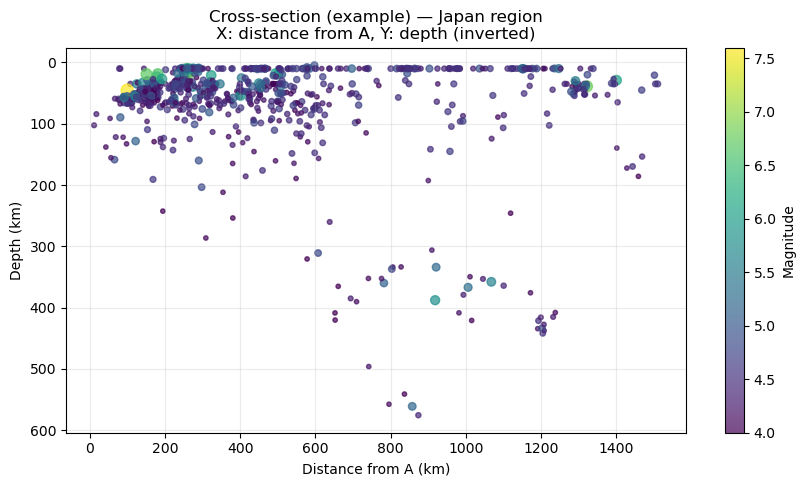

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d = df.copy()
d["time"] = pd.to_datetime(d["time"], utc=True, errors="coerce")
d = d.dropna(subset=["time","latitude","longitude","depth","mag"]).sort_values("time").reset_index(drop=True)

sub = d[
    d["latitude"].between(30, 46) &
    d["longitude"].between(129, 147)
].copy()

print("Points in region:", len(sub))

# --- Pick 2 endpoints for a "transect" (A -> B). Change if you want. ---
A_lat, A_lon = 41.0, 141.0
B_lat, B_lon = 35.0, 146.0

def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

# Distance along transect = distance from A (simple approximation)
sub["dist_km"] = haversine_km(A_lat, A_lon, sub["latitude"].values, sub["longitude"].values)

# Point size ~ magnitude
sub["s"] = np.clip((sub["mag"] - sub["mag"].min() + 0.3) * 20, 10, 200)

plt.figure(figsize=(10,5))
sc = plt.scatter(sub["dist_km"], sub["depth"], s=sub["s"], c=sub["mag"], alpha=0.7)
plt.gca().invert_yaxis()
plt.colorbar(sc, label="Magnitude")
plt.title("Cross-section (example) — Japan region\nX: distance from A, Y: depth (inverted)")
plt.xlabel("Distance from A (km)")
plt.ylabel("Depth (km)")
plt.grid(alpha=0.25)
plt.show()


In [16]:
boxes = {
    "Americas":     {"lat":(-60,83),"lon":(-170,-30)},
    "Europe":       {"lat":(35,72), "lon":(-25,45)},
    "Africa":       {"lat":(-35,38),"lon":(-20,55)},
    "Asia-Oceania": {"lat":(-50,80),"lon":(45,180)}
}
for k,b in boxes.items():
    n = df[df["latitude"].between(*b["lat"]) & df["longitude"].between(*b["lon"])].shape[0]
    print(k, n)


rows = []
for k,b in boxes.items():
    sub = df[df["latitude"].between(*b["lat"]) & df["longitude"].between(*b["lon"])]
    rows.append([k, sub["depth"].mean(), sub["depth"].median()])
pd.DataFrame(rows, columns=["continent","mean_depth","median_depth"]).sort_values("mean_depth", ascending=False)


Americas 2774
Europe 736
Africa 1160
Asia-Oceania 11931


continent  mean_depth  median_depth
3  Asia-Oceania   60.336186       27.0000
0      Americas   60.300261       23.1735
1        Europe   17.370553       10.0000
2        Africa   13.600059       10.0000

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Base
d = df.copy()
d["time"] = pd.to_datetime(d["time"], utc=True, errors="coerce")
d = d.dropna(subset=["latitude","longitude","depth","mag"]).reset_index(drop=True)

# Simple point sizing
d["s"] = np.clip((d["mag"] - d["mag"].min() + 0.3) * 18, 8, 180)

def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

continents = {
    "Americas":      {"lat": (-60, 83), "lon": (-170, -30), "A": (15.0, -95.0)},
    "Europe":        {"lat": (35, 72),  "lon": (-25, 45),   "A": (50.0, 10.0)},
    "Africa":        {"lat": (-35, 38), "lon": (-20, 55),   "A": (0.0, 20.0)},
    "Asia-Oceania":  {"lat": (-50, 80), "lon": (45, 180),   "A": (25.0, 120.0)},
}

# Shared color scale for magnitude
vmin, vmax = float(d["mag"].min()), float(d["mag"].max())

# Shared y-axis limits (same depth scale everywhere)
ymin, ymax = 0, float(d["depth"].max())

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
axes = axes.ravel()

sc = None
for i, (name, box) in enumerate(continents.items()):
    ax = axes[i]

    sub = d[
        d["latitude"].between(*box["lat"]) &
        d["longitude"].between(*box["lon"])
    ].copy()

    lat0, lon0 = box["A"]
    sub["dist_km"] = haversine_km(lat0, lon0, sub["latitude"].values, sub["longitude"].values)

    sc = ax.scatter(
        sub["dist_km"], sub["depth"],
        s=sub["s"], c=sub["mag"],
        vmin=vmin, vmax=vmax,
        alpha=0.65,
        cmap="viridis_r"
    )

    ax.set_title(f"{name} (n={len(sub)})")
    ax.set_xlabel("Distance from anchor (km)")
    ax.grid(alpha=0.25)

    # same depth axis everywhere
    ax.set_ylim(ymax, ymin)  # inverted with fixed range

# Y label only on left column (cleaner)
axes[0].set_ylabel("Depth (km)", rotation=0, labelpad=40, va="center")
axes[2].set_ylabel("Depth (km)", rotation=0, labelpad=40, va="center")

# Leave space on the right for a non-overlapping colorbar
fig.subplots_adjust(right=0.86, top=0.92, wspace=0.18, hspace=0.25)

# Dedicated colorbar axis on the right
cax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cax)
cbar.ax.invert_yaxis()

cbar.set_label("Magnitude", rotation=0, labelpad=15)

fig.suptitle("Earthquake depth and frequency distribution across continental regions \n (01/01/2025 - 31/12/2025)")
plt.show()


This graph was our previous graph. But it was not very clear. So we decided to go to an hist chart.

H1 : L’intensité et la densité sismique varient fortement selon les continents.



-----------------------

# Storyboard and hand-drawn blueprint

<div class="alert alert-info" role="alert">
    <b> In this section : </b> 
you explain what you have observed in the dataset and how you plan to communicate these findings to a general audience. You will provide a drawing of your expected graph. Handover your sketch on hippocampus by the end of the first session.
</div>

The exploration of the dataset shows that earthquakes are not uniformly distributed across the globe. Instead, they concentrate in specific regions, particularly along tectonic plate boundaries. We also observe significant differences in depth and intensity depending on the geological context.

To communicate these findings clearly to a general audience, we structured the presentation in three progressive steps:

World map – This provides an intuitive and visual introduction. It immediately reveals the spatial concentration of earthquakes and highlights the alignment with tectonic plate boundaries. This step establishes the global context.


Aftershock dynamics (time-to-baseline analysis) – Finally, we focus on a specific mainshock and analyze how seismic activity evolves afterward. By measuring how long it takes for daily activity to return to its pre-event level, we illustrate the temporal structure of earthquake sequences and the typical decay of aftershocks.

This progression moves from spatial understanding (where earthquakes occur), to statistical structure (how magnitudes are distributed), and finally to temporal dynamics (how seismic activity evolves over time).

# Building the final graphs.

<div class="alert alert-info" role="alert">
    <b> Publication ready graph</b> 
The graphs have to be self contained figures. By reading them, the audience should know what they are looking at, how to interpret it and be able to comfort their understanding with the data shown.

Your work will be presented to the class on 12th Feb. 5 mins per group.
</div>

In [30]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import requests

# 1. Nettoyage et préparation des données
dmap = df.copy()
dmap = dmap.dropna(subset=["latitude", "longitude", "mag"])

size_factor = 2
size_min = 0.5
size_max = 30

mag_min = dmap["mag"].min(skipna=True)
dmap["mag_size"] = np.clip(
    (dmap["mag"] - mag_min + 0.3) * size_factor,
    size_min,
    size_max
)

# 2. Création de la figure (Séismes)
fig = px.scatter_geo(
    dmap,
    lat="latitude",
    lon="longitude",
    size="mag_size",
    hover_name="place",
    hover_data={"mag": ":.2f", "depth": ":.1f", "mag_size": False},
    projection="natural earth"
)

# CORRECTION OVERLAP : Couleur opaque (1.0) pour éviter l'accumulation d'intensité
fig.update_traces(
    marker=dict(
        color="rgba(0, 100, 255, 1.0)",  # Opacité à 100%
        line=dict(width=0.2, color="white") # Contour fin pour séparer les cercles
    )
)

# 3. Configuration du Titre et Layout
fig.update_layout(
    title={
        "text": "Global Distribution of Earthquakes reflecting the boundaries of tectonic plates"
                "<br><sub>(from 01/01/2025 to 31/12/2025)</sub>",
        "x": 0.5,
        "xanchor": "center",
        "y": 0.90,
        "yanchor": "top"
    },
    height=600,
    margin=dict(t=120, b=70)
)

# 4. Légende des séismes
fig.add_trace(
    go.Scattergeo(
        lat=[None], lon=[None],
        mode="markers",
        marker=dict(size=8, color="rgba(0, 100, 255, 1.0)"),
        name="Earthquakes",
        showlegend=True
    )
)

# 5. Configuration de la carte (Geo)
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True, # Réactivé pour plus de contexte avec des points opaques
        coastlinecolor="lightgray",
        landcolor="whitesmoke",
        bgcolor="rgba(0,0,0,0)"
    )
)

# 6. Échelle de magnitude dans la légende
mag_examples = [5, 6, 7, 8, 9]
size_examples = np.clip(
    (np.array(mag_examples) - mag_min + 0.3) * size_factor,
    size_min,
    size_max
)

for mag, size in zip(mag_examples, size_examples):
    fig.add_trace(
        go.Scattergeo(
            lat=[None], lon=[None],
            mode="markers",
            marker=dict(
                size=size,
                color="rgba(0,0,0,0)",
                line=dict(color="rgb(0,0,0)", width=1.5)
            ),
            name=f"Magnitude {mag}",
            showlegend=True
        )
    )

fig.update_layout(
    legend=dict(
        itemsizing="trace",
        x=1, y=0.5,
        xanchor="left", yanchor="middle",
        bgcolor="rgb(255,255,255)"
    )
)

# 7. Frontières des plaques tectoniques
plates_url = "https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json"
plates_geojson = requests.get(plates_url).json()

def add_plate_boundaries(fig, geojson, line_width=1.2, line_color="rgba(0,0,0,0.55)", name="Plate boundaries"):
    first = True
    # Optimisation : On regroupe les lignes pour ne pas surcharger Plotly
    for feat in geojson.get("features", []):
        geom = feat.get("geometry", {})
        gtype = geom.get("type")
        coords = geom.get("coordinates", [])

        if gtype == "LineString":
            lines = [coords]
        elif gtype == "MultiLineString":
            lines = coords
        else:
            continue

        for line in lines:
            lons = [pt[0] for pt in line]
            lats = [pt[1] for pt in line]
            fig.add_trace(
                go.Scattergeo(
                    lon=lons, lat=lats,
                    mode="lines",
                    line=dict(width=line_width, color=line_color),
                    name=name if first else None,
                    showlegend=first,
                    hoverinfo='skip' # Évite d'interférer avec le hover des séismes
                )
            )
            first = False
    return fig

# Ajout des plaques avec un trait noir net
fig = add_plate_boundaries(fig, plates_geojson, line_width=1.5, line_color="rgb(0,0,0)")

# 8. Source footer
fig.add_annotation(
    text="Source: USGS Earthquake Archives",
    xref="paper", yref="paper",
    x=0.0, y=-0.08,
    xanchor="left", yanchor="bottom",
    showarrow=False,
    font=dict(size=12, color="dimgray")
)

fig.show()

This chart shows the distribution of the 18,000 earthquakes that occurred in 2025. The patterns formed by their locations outline the boundaries of tectonic plates, highlighting plate interactions as a major cause of earthquakes. However, some earthquakes occur away from these plate boundaries because they are associated with geological faults. 

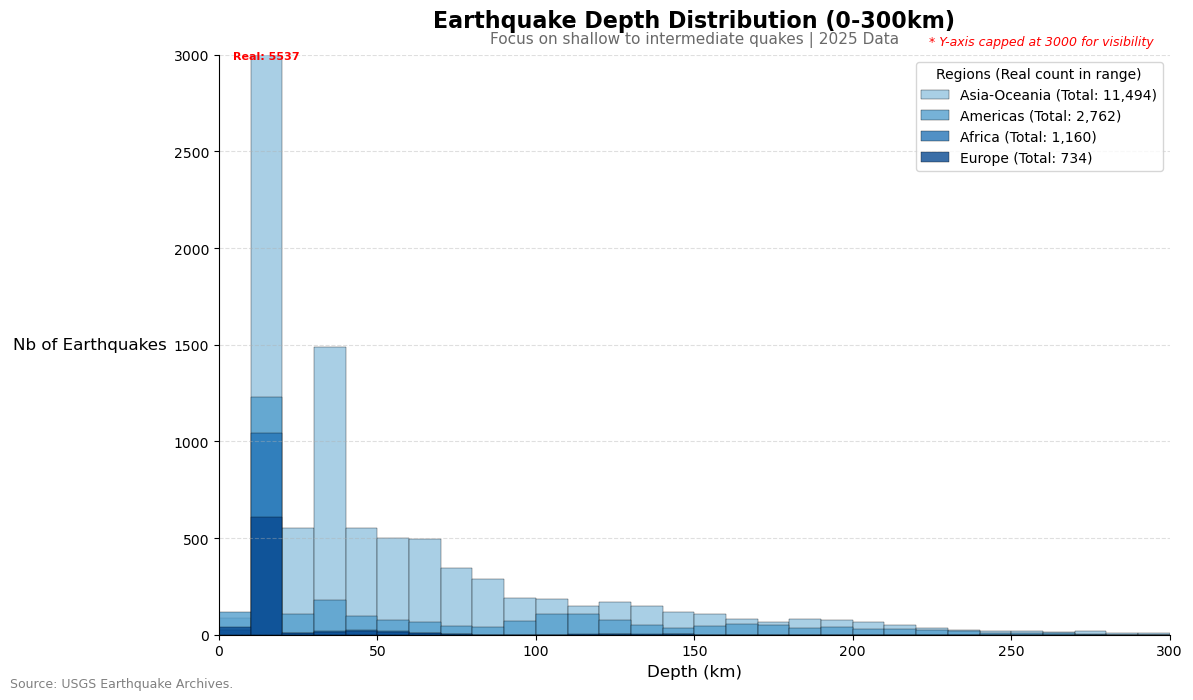

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Préparation des données
d = df.copy()
d["time"] = pd.to_datetime(d["time"], utc=True, errors="coerce")
d = d.dropna(subset=["latitude","longitude","depth","mag"]).reset_index(drop=True)

continents = {
    "Americas":     {"lat": (-60, 83), "lon": (-170, -30)},
    "Europe":        {"lat": (35, 72),  "lon": (-25, 45)},
    "Africa":        {"lat": (-35, 38), "lon": (-20, 55)},
    "Asia-Oceania":  {"lat": (-50, 80), "lon": (45, 180)},
}

bins = np.arange(0, 301, 10) 

subsets = {}
counts = {}

for name, box in continents.items():
    sub = d[
        d["latitude"].between(*box["lat"]) & 
        d["longitude"].between(*box["lon"]) &
        d["depth"].between(0, 300)
    ].copy()
    
    subsets[name] = sub["depth"]
    counts[name] = len(sub)

sorted_continents = sorted(counts.keys(), key=lambda x: counts[x], reverse=True)
cmap = plt.cm.Blues
colors = [cmap(x) for x in np.linspace(0.4, 0.9, len(sorted_continents))]

fig, ax = plt.subplots(figsize=(12, 7))

# 2. Tracé
for name, color in zip(sorted_continents, colors):
    hist_counts, edges = np.histogram(subsets[name], bins=bins)
    label_with_count = f"{name} (Total: {counts[name]:,})"
    
    for i in range(len(hist_counts)):
        ax.bar(
            edges[i], 
            hist_counts[i], 
            width=edges[i+1] - edges[i], 
            align="edge", 
            color=color, 
            edgecolor="black", 
            linewidth=0.3,
            alpha=0.8,
            label=label_with_count if i == 0 else ""
        )
        
        # Annotation si dépassement
        if hist_counts[i] > 3000:
            ax.annotate(f"Real: {hist_counts[i]}", 
                        xy=(edges[i] + 5, 2980), 
                        ha='center', fontsize=8, fontweight='bold', color='red')

# 3. Limites et style corrigé
ax.set_xlim(0, 300)
ax.set_ylim(0, 3000)

ax.set_title("Earthquake Depth Distribution (0-300km)", fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel("Depth (km)", fontsize=12)
ax.set_ylabel("Nb of Earthquakes                        ", fontsize=12, labelpad=15, rotation=0, va='center')

# CORRECTION ICI : fontstyle au lieu de linestyle
if any(c > 3000 for c in counts.values()):
    ax.text(295, 3050, "* Y-axis capped at 3000 for visibility", 
            ha='right', fontsize=9, color='red', fontstyle='italic')

ax.text(0.5, 1.02, "Focus on shallow to intermediate quakes | 2025 Data", 
        transform=ax.transAxes, ha="center", fontsize=11, color="dimgray")

ax.grid(axis='y', linestyle="--", alpha=0.4)
ax.legend(title="Regions (Real count in range)", frameon=True, loc="upper right")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

fig.text(0.01, 0.01, "Source: USGS Earthquake Archives.", 
         ha="left", fontsize=9, color="gray")

plt.tight_layout()
plt.show()

Why this graph?
This histogram compares earthquake depth distributions across major continental regions to highlight structural differences in seismic activity. Using a logarithmic scale allows us to observe both common shallow events and rarer deep earthquakes within the same visualization.

How it was constructed
We filtered the dataset, grouped earthquakes by continent using geographic bounding boxes, and computed depth histograms with consistent bins (0–700 km). The regions were then plotted together on a shared axis to enable direct comparison.

C:\Users\corio\AppData\Local\Temp\ipykernel_22864\3643949423.py:23: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



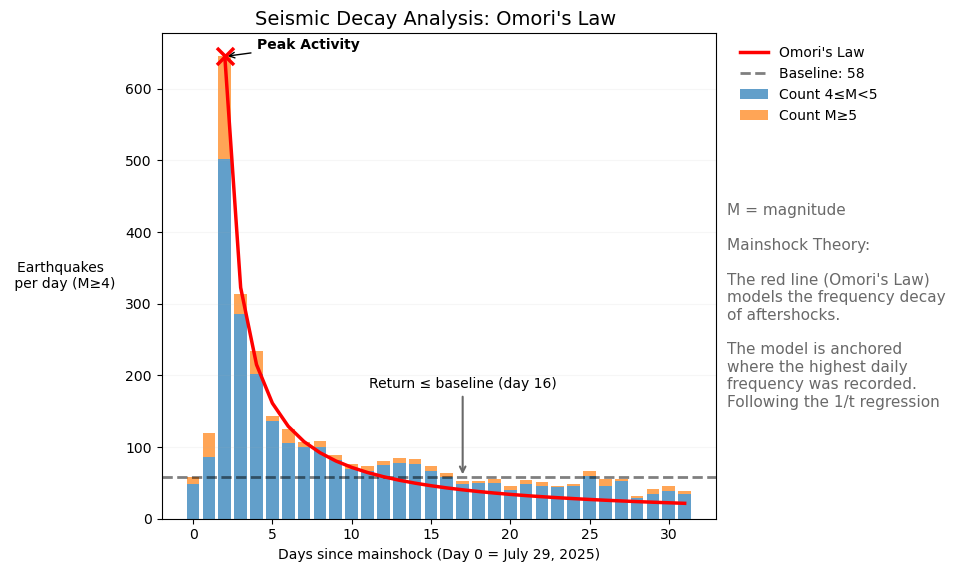

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Préparation des données ---
d = df.copy()
d["time"] = pd.to_datetime(d["time"], utc=True, errors="coerce")
d = d.dropna(subset=["time","mag"]).sort_values("time").reset_index(drop=True)

t0 = pd.Timestamp("2025-07-29T23:24:52.483Z")
window_days = 30
t1 = t0 + pd.Timedelta(days=window_days)
prev_day = (t0.floor("D") - pd.Timedelta(days=1))

window = d[(d["time"] >= prev_day) & (d["time"] < t1)].copy()
window["day"] = window["time"].dt.floor("D")

window = window[window["mag"] >= 4.0].copy()
bins = [4.0, 5.0, 10.0]
labels = ["4≤M<5", "M≥5"]
window["mag_band"] = pd.cut(window["mag"], bins=bins, labels=labels, right=False)

counts = window.pivot_table(index="day", columns="mag_band", values="mag", aggfunc="count", fill_value=0)
counts = counts.reindex(pd.date_range(prev_day, t1.floor("D"), freq="D"), fill_value=0)

total = counts.sum(axis=1)
baseline = float(total.loc[prev_day])
start_day = t0.floor("D")

# --- CORRECTION DE LA BOUCLE (KeyError) ---
ret_idx = None
# On itère sur l'index (les dates) et non les valeurs
for day in total.loc[start_day:].index:
    if total.loc[day] <= baseline:
        ret_idx = day
        break

x = np.arange(len(counts.index))

# --- Plot ---
fig, ax = plt.subplots(figsize=(13,6))

# 1. Barres d'activité
bottom = np.zeros(len(counts))
for band in labels:
    ax.bar(x, counts.get(band, 0).to_numpy(), bottom=bottom,
        label=f"Count {band}", alpha=0.7)
    bottom += counts.get(band, 0).to_numpy()

# 2. Courbe d'Omori et Croix à J+1
mainshock_idx = np.where(counts.index == start_day)[0][0]
theory_start_idx = mainshock_idx + 1 

if theory_start_idx < len(total):
    theory_count = float(total.iloc[theory_start_idx])
    x_theory = np.arange(theory_start_idx, len(counts.index))
    t_relative = x_theory - theory_start_idx + 1 
    y_theory = theory_count / t_relative

    ax.plot(x_theory, y_theory, color="red", linestyle="-", linewidth=2.5, 
            label="Omori's Law", zorder=5)

    # Croix sur le pic à J+1
    ax.scatter([theory_start_idx], [theory_count], color="red", marker="x", 
            s=150, linewidths=2.5, zorder=6)

    # AJUSTEMENT POSITION : descente de l'annotation (de +50 à +10)
    ax.annotate("Peak Activity", 
                xy=(theory_start_idx, theory_count), 
                xytext=(theory_start_idx + 2, theory_count + 10),
                arrowprops=dict(arrowstyle="->", color="black"), 
                fontweight='bold')

# Baseline
ax.axhline(baseline, linestyle="--", linewidth=2, color="black", alpha=0.5,
        label=f"Baseline: {baseline:.0f}")

# Return arrow
if ret_idx is not None:
    ret_pos = np.where(counts.index == ret_idx)[0][0]
    day_j = int((ret_idx - start_day).days)
    ax.annotate(
        f"Return ≤ baseline (day {day_j})",
        xy=(ret_pos, baseline),
        xytext=(ret_pos, baseline + 120),
        arrowprops=dict(arrowstyle="->", lw=1.5, color="dimgray"),
        ha="center", va="bottom"
    )

# Legend et Texte
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), frameon=False)

ax.text(
    1.02, 0.65,
    "M = magnitude\n\n"
    "Mainshock Theory:\n\n"
    "The red line (Omori's Law)\n"
    "models the frequency decay\n"
    "of aftershocks.\n\n"
    "The model is anchored\n"
    "where the highest daily\n"
    "frequency was recorded.\n"
    "Following the 1/t regression\n",
    transform=ax.transAxes, ha="left", va="top", fontsize=11, color="dimgray"
)

ax.set_title("Seismic Decay Analysis: Omori's Law ", fontsize=14)
ax.set_xlabel("Days since mainshock (Day 0 = July 29, 2025)")
ax.set_ylabel("Earthquakes \n per day (M≥4)", rotation=0, labelpad=45, va="center")
ax.grid(alpha=0.1, axis="y")

plt.tight_layout(rect=[0, 0.03, 0.75, 1])
plt.show()

From a construction perspective, we first identified the mainshock and defined a time window around it. We then aggregated earthquakes by day, separated them into magnitude bands, and compared the daily counts to the pre-mainshock baseline in order to visually measure the return-to-normal threshold.

Aftershock dynamics (time-to-baseline analysis): This analysis focuses on a specific mainshock and examines the temporal evolution of seismic activity following the event. By measuring the time required for daily earthquake frequency to return to its pre-event baseline level, it highlights the temporal structure of earthquake sequences and the characteristic decay pattern of aftershocks. 

# Sources : USGS Earthquake Archives